# NUTRIENT PROFILING: Cereal Rating Prediction With Linear Regression

# A. Data Acquision

# 1. Import Libraries,Packages, and Modules

In [1]:
import pandas as pd  #Pandas is used for data wrangling
import numpy as np   #Numpy is used for computing matrices and vectors
import matplotlib.pyplot as plt   #Matplotlib is use to generate visualizations like histograms, scatter plots, bar charts, pie charts and much more.
import seaborn as sns   #Seaborn is built on top of Matplotlib.It provides visualizations that are more aesthetic and statistically sophisticated.
from sklearn.preprocessing import StandardScaler #For bringing all the features to the same scale
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV #For splitting data to train and test sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet #For building linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error #For evaluating model

import warnings
warnings.filterwarnings('ignore')     #For ignoring warnings

# 2. Import Dataset

In [2]:
#import dataset with pandas library
cereal = pd.read_csv('/content/cereal.csv')

# B. Data Preproccessing
 Data Preprocessing includes Data Wrangling/Munging/Cleaning and Exploratory Data Analysis/Data Visualization.

## 1. Data Wrangling/Munging/Cleaning

In [3]:
#Display first 10 rows/observations of the dataset to have a first glimpse of the content
cereal.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


##### Observations
Features such as potass,carbo, and sugars have -1 values which may impact the statistics of the dataset and may impact model negatively.

In [4]:
#Replace -1 in carbo, sugar, and potass columns with 0
cereal.carbo = np.where(cereal["carbo"] < 0, 0, cereal["carbo"])
cereal.sugars = np.where(cereal["sugars"] < 0, 0, cereal["sugars"])
cereal.potass = np.where(cereal["potass"] < 0, 0, cereal["potass"])

In [5]:
#Check the dimension of the dataset
display(f'The dataset has {cereal.shape[0]} rows and {cereal.shape[1]} columns')

'The dataset has 77 rows and 16 columns'

In [6]:
#Check the features, feature data types, and possible missing values
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


#### Observation:
1. The dataset has features with data types:float64(5), int64(8), object(3).
2. The features with data type Object(String) are categorical features/Variables
3. The features with data types Integer and Float are numeric features/Variables
4. The dataset does not have missing values

In [7]:
#The object data types in our dataset are categorical
#check the number of categories in each of the categorical variables
cereal.select_dtypes("object").nunique()

name    77
mfr      7
type     2
dtype: int64

#### Observation:
1. The categorical variable "name" has 77 categories
2. The categorical variable "mfr" has 7 categories
3. The categorical variable "type" has 2 categories
4. The categorical variables "name" and "mfr" are high cardinality caterogical features that we need to drop so as not to cause high dimensional features.

In [8]:
#Drop very high cardinality categorical features
cereal= cereal.drop(["name", "mfr"], axis=1)
cereal.columns

Index(['type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [9]:
#Check the unique categories in categorical feature "type"
cereal["type"].unique()

array(['C', 'H'], dtype=object)

# 2. Exploratory Data Analysis
Exploratory Data Analysis is the visualization of the variables in the dataset.It is subdivided into: Univariate, Bivariate and Multivariate Data Analysis.
As displayed in the cell above, there are 2 types of features in our dataset.They are `categorical`and  `numerical` features.
We shall visualize them to have a glipse of information they contain. Visualizing those features will help us gain deep insight into our dataset before we build our model

## 2.1. Univariate Data Analysis of `Categorical Feature`  in the Dataset
Our dataset contains only 1 categorical feature (type) after removing high cardinality categorical features

### 2.1.1 Univariate Data Analysis of Categorical Feature `type`

In [10]:
#Extract only the categorical variable from the dataframe
cereal.select_dtypes("object").head(3)

,type
0,C
1,C
2,C


In [11]:
#Check the number of categories in each of the categorical variables
cereal.select_dtypes("object").nunique()

type    2
dtype: int64

In [12]:
#Check numbers of different categories of "type" contained in our dataset
cereal["type"].value_counts()

C    74
H     3
Name: type, dtype: int64

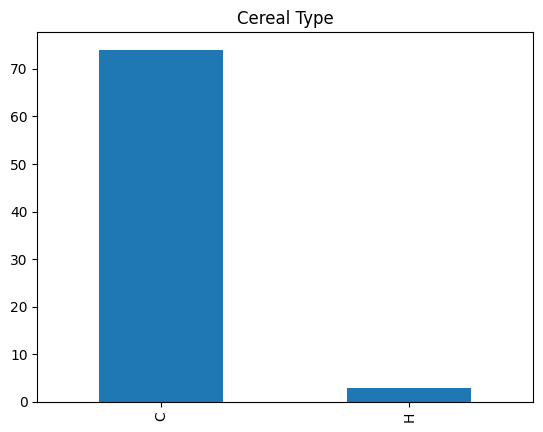

In [13]:
#Visualizing the categories in "type" using pandas library.
cereal["type"].value_counts().plot(kind="bar", x ="type", y = "Frequency",title = "Cereal Type");

##### Observation
There is more of cold cereal than hot cereal in our dataset

## 2.2 Univariate Data Analysis of `Numerical Features` in the Dataset

In [14]:
#Extract only the numeric variables from the dataframe
cereal.select_dtypes("number").head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,0,25,3,1.00,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


##### Observations
There are 13 numerical features in the dataset. The target feature "rating" is inclusive.

In [15]:
# Describe the statistics of the numeric features in the dataset.
cereal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.610390,4.232257,0.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.935065,4.422840,0.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.103896,71.251147,0.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [16]:
#Replacing -1 in carbo, sugar, and potass columns with 0
cereal.carbo = np.where(cereal["carbo"] < 0, 0, cereal["carbo"])
cereal.sugars = np.where(cereal["sugars"] < 0, 0, cereal["sugars"])
cereal.potass = np.where(cereal["potass"] < 0, 0, cereal["potass"])

In [17]:
# Describing the statistics of the numeric features in the dataset.
cereal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.610390,4.232257,0.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.935065,4.422840,0.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.103896,71.251147,0.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


## 2.2.1 Univariate Analysis of Numerical Feature `rating`

In [18]:
def plotting_3_chart(dataset, feature):
    """This function plots 3 charts"""
    ## Importing seaborn, matplotlab and scipy modules.
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.distplot(dataset.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title.
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot.
    stats.probplot(dataset.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(dataset.loc[:,feature], orient='v', ax = ax3 );

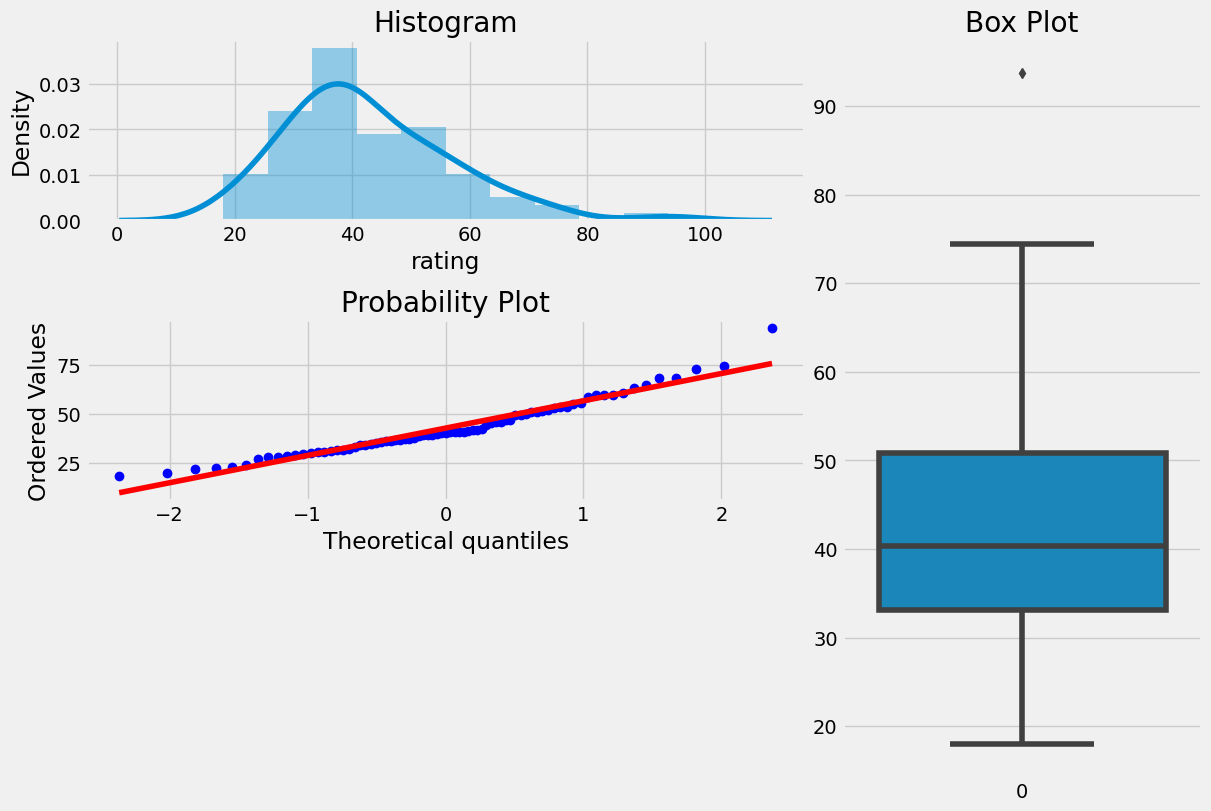

In [19]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for rating feature
plotting_3_chart(cereal, 'rating')

##### Observations

These three charts above can tell us a lot about our target variable.

Our target variable, rating is not normally distributed as seen in the histogram.
Our target variable is right-skewed as seen in the histogram.
one of the assumptions of multiple linear regression is that each numeric feature must has normal distribution

There is just one outlier in our variable as seen in the boxplot.
The box-plot also revealed the skewness of our target variable

The QQ-plot has so many datapoint that are far away from the line, so the rating feature in not normally distributed

In [20]:
#skewness and kurtosis for rating feature
print("Skewness: " + str(cereal['rating'].skew()))
print("Kurtosis: " + str(cereal['rating'].kurt()))

Skewness: 0.9102403073331322
Kurtosis: 1.3187469240112781


###### Observation
The distribution of rating feature is moderately skewed because it lies betwwen 0.5 and 1
The distribution of rating feature has a Negative Kurtosis/Platykurtic because it's <3

## 2.2.2 Univariate Analysis of Numerical Feature `calories`

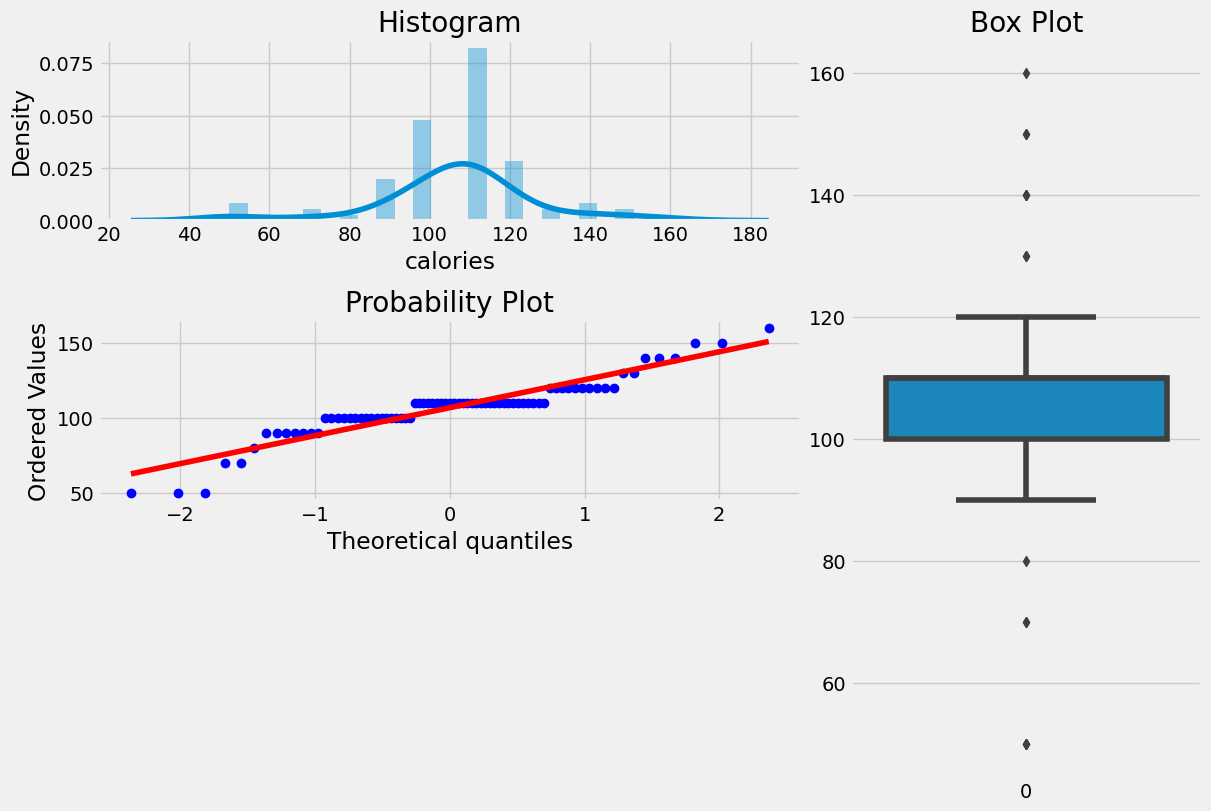

In [21]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for calories feature
plotting_3_chart(cereal, 'calories')

In [22]:
#skewness and kurtosis for calories feature
print("Skewness: " + str(cereal['calories'].skew()))
print("Kurtosis: " + str(cereal['calories'].kurt()))

Skewness: -0.4454067394535457
Kurtosis: 2.3701459531424245


## 2.2.3 Univariate Analysis of Numerical Feature `protein`

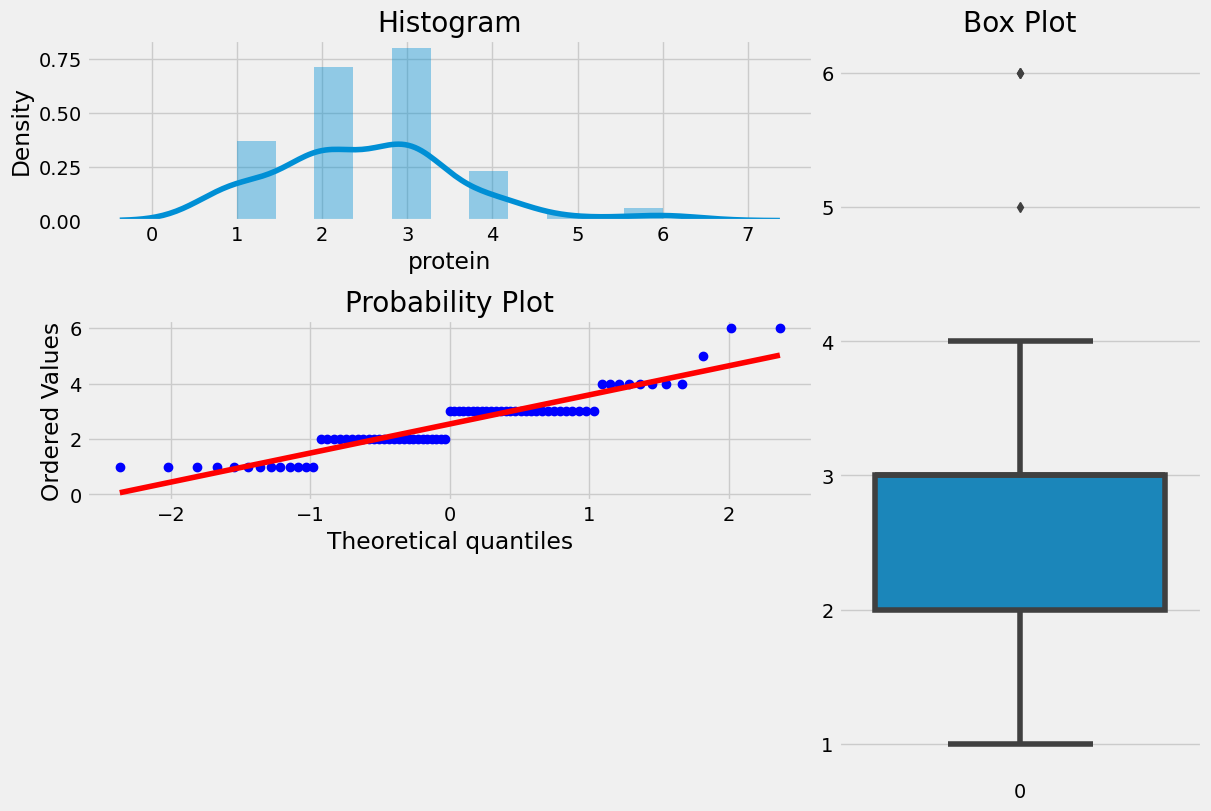

In [23]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for protein feature
plotting_3_chart(cereal, 'protein')

In [24]:
#skewness and kurtosis for protein feature
print("Skewness: " + str(cereal['protein'].skew()))
print("Kurtosis: " + str(cereal['protein'].kurt()))

Skewness: 0.7458299159881173
Kurtosis: 1.1846559801581495


## 2.2.4 Univariate Analysis of Numerical Feature `fat`

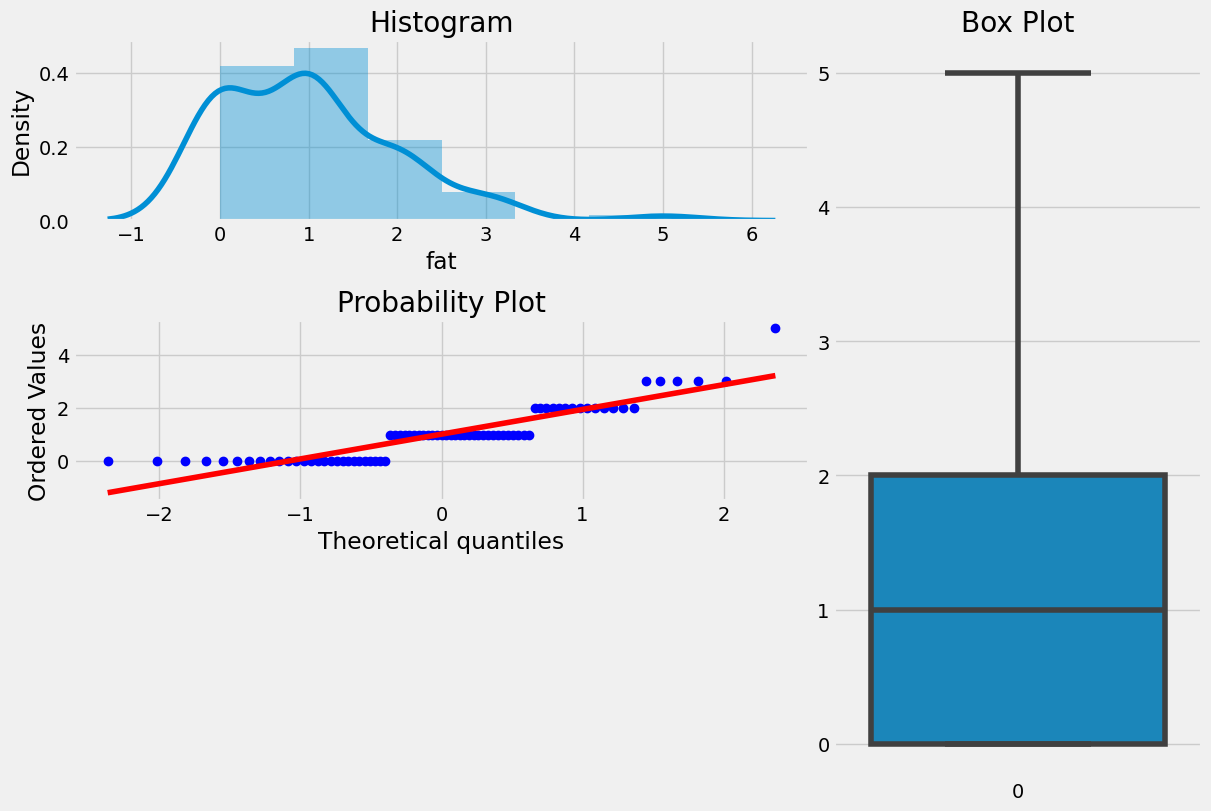

In [25]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for fat feature
plotting_3_chart(cereal, 'fat')

In [26]:
#skewness and kurtosis for fat feature
print("Skewness: " + str(cereal['fat'].skew()))
print("Kurtosis: " + str(cereal['fat'].kurt()))

Skewness: 1.1659888304247328
Kurtosis: 2.0446551409709315


## 2.2.5 Univariate Analysis of Numerical Feature `sodium`

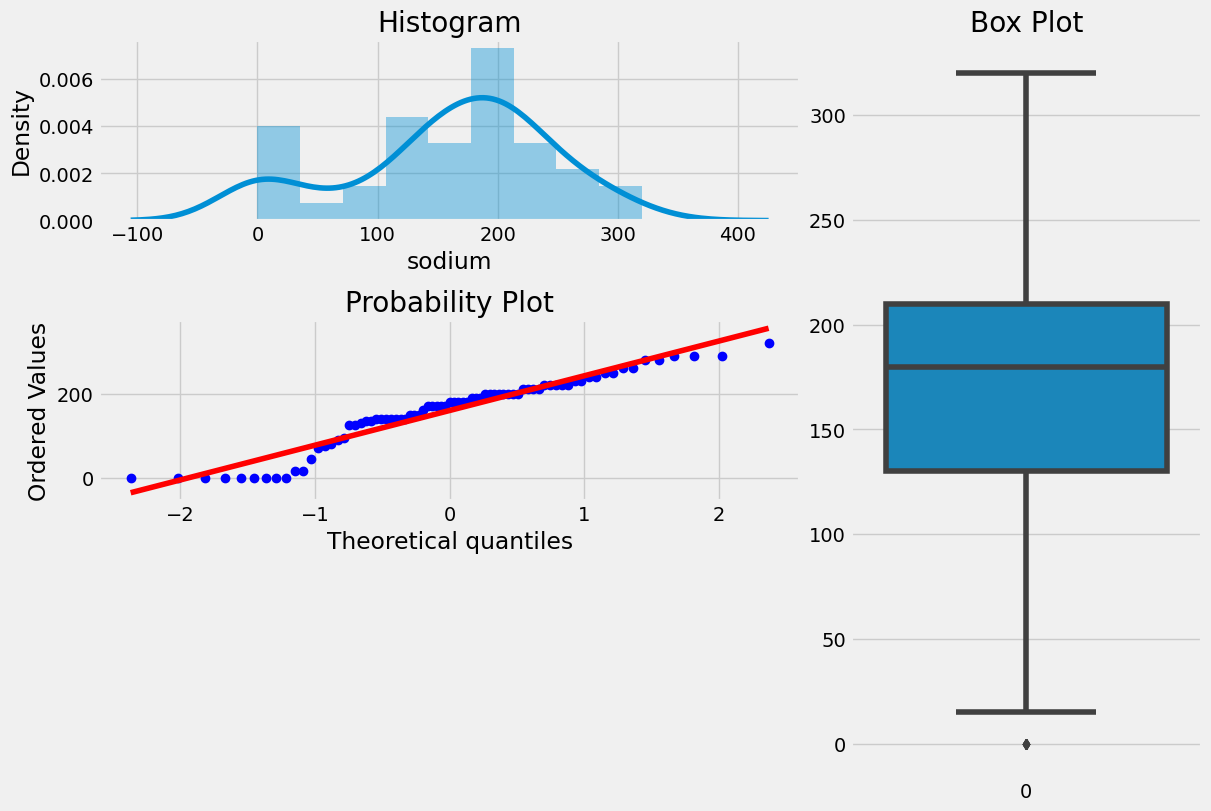

In [27]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for sodium feature
plotting_3_chart(cereal, 'sodium')

In [28]:
#skewness and kurtosis for sodium feature
print("Skewness: " + str(cereal['sodium'].skew()))
print("Kurtosis: " + str(cereal['sodium'].kurt()))

Skewness: -0.5757113513318187
Kurtosis: -0.34524266921026925


## 2.2.6 Univariate Analysis of Numerical Feature `fiber`

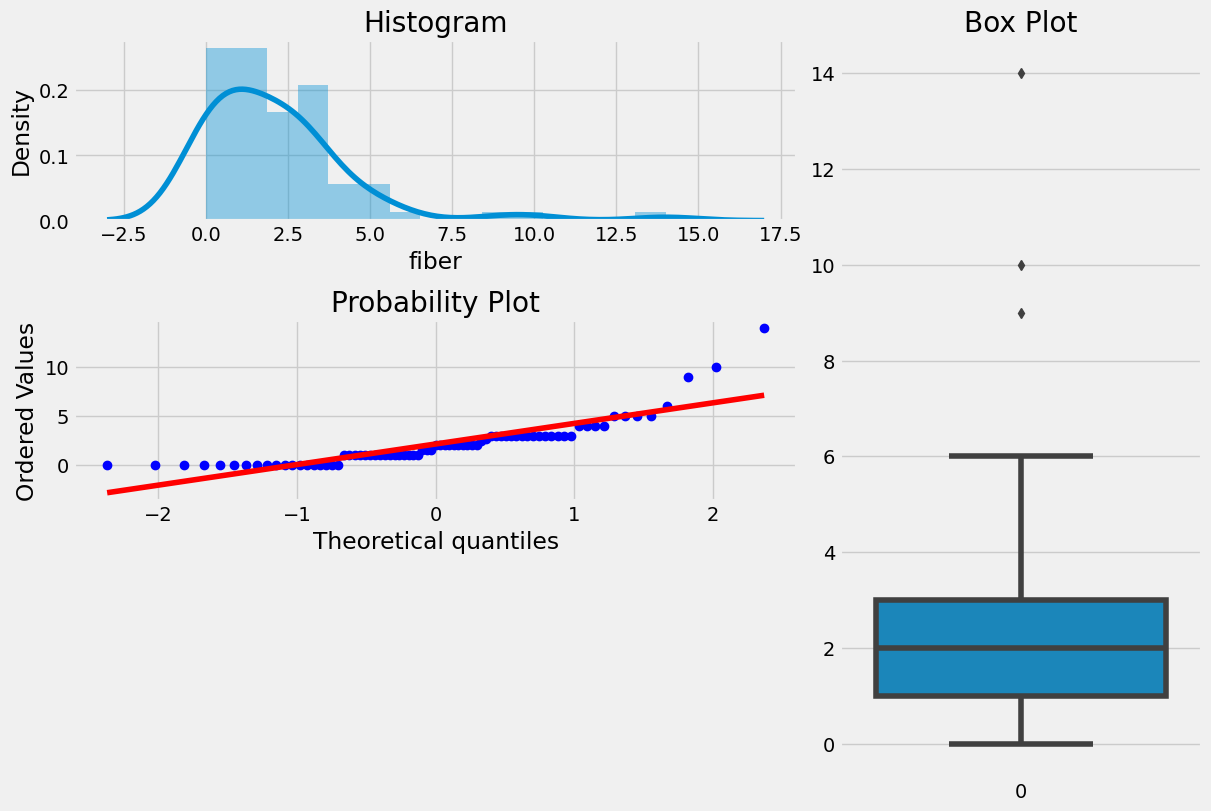

In [29]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for fat feature
plotting_3_chart(cereal, 'fiber')

In [30]:
#skewness and kurtosis for fiber feature
print("Skewness: " + str(cereal['fiber'].skew()))
print("Kurtosis: " + str(cereal['fiber'].kurt()))

Skewness: 2.431674992853831
Kurtosis: 8.647491676694626


## 2.2.7 Univariate Analysis of Numerical Feature `carbo`

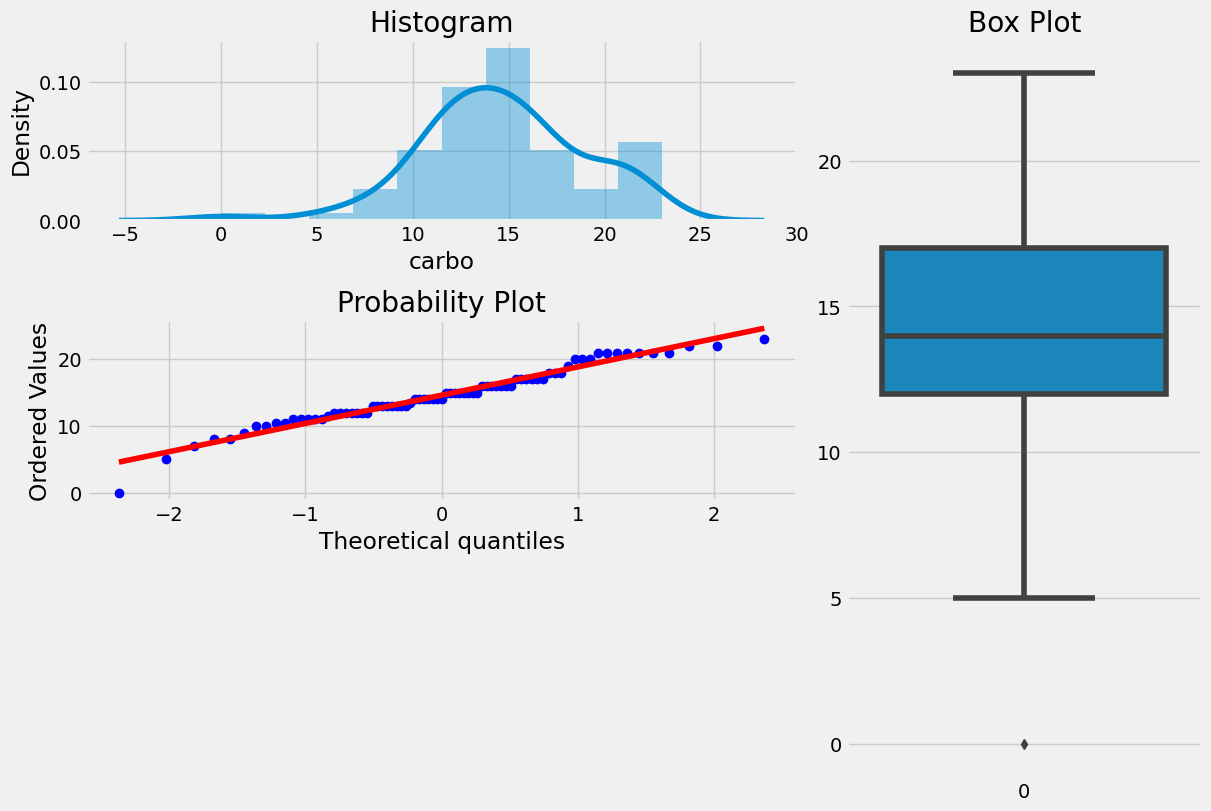

In [31]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for carbo feature
plotting_3_chart(cereal, 'carbo')

In [32]:
#skewness and kurtosis for carbo feature
print("Skewness: " + str(cereal['carbo'].skew()))
print("Kurtosis: " + str(cereal['carbo'].kurt()))

Skewness: -0.3504779236191244
Kurtosis: 0.9238386121860778


## 2.2.8 Univariate Analysis of Numerical Feature `sugars`

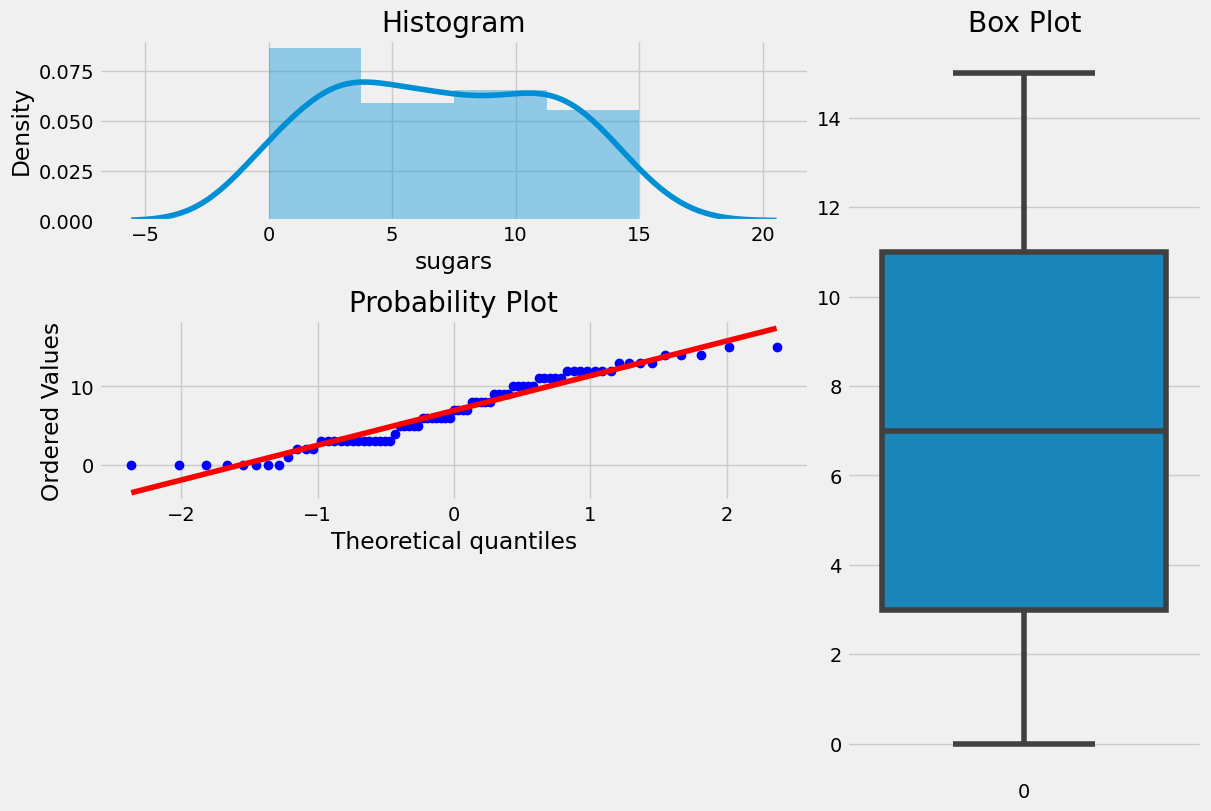

In [33]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for sugars feature
plotting_3_chart(cereal, 'sugars')

In [34]:
#skewness and kurtosis for sugars feature
print("Skewness: " + str(cereal['sugars'].skew()))
print("Kurtosis: " + str(cereal['sugars'].kurt()))

Skewness: 0.05193708829007913
Kurtosis: -1.1636703103291746


## 2.2.9 Univariate Analysis of Numerical Feature `potass`

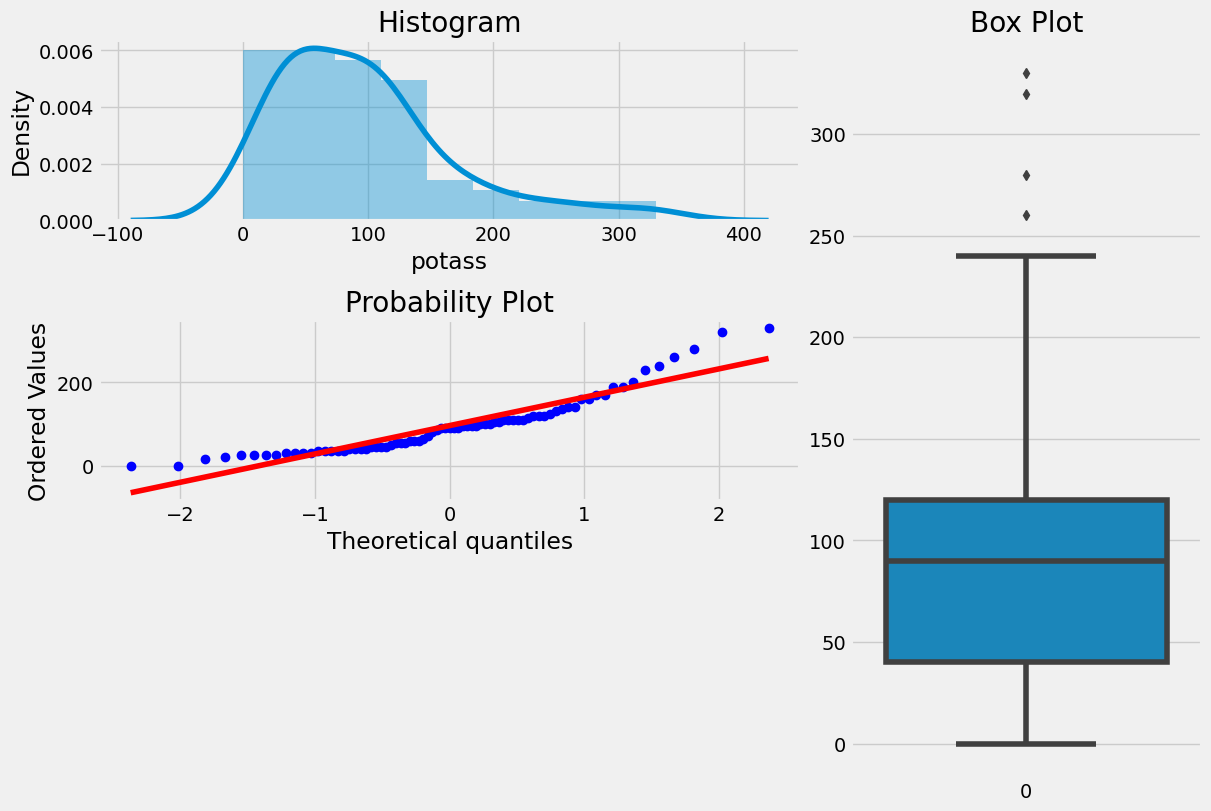

In [35]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for potass feature
plotting_3_chart(cereal, 'potass')

In [36]:
#skewness and kurtosis for potass feature
print("Skewness: " + str(cereal['potass'].skew()))
print("Kurtosis: " + str(cereal['potass'].kurt()))

Skewness: 1.3539680935764034
Kurtosis: 1.8951478336807615


## 2.2.10 Univariate Analysis of Numerical Feature `vitamins`

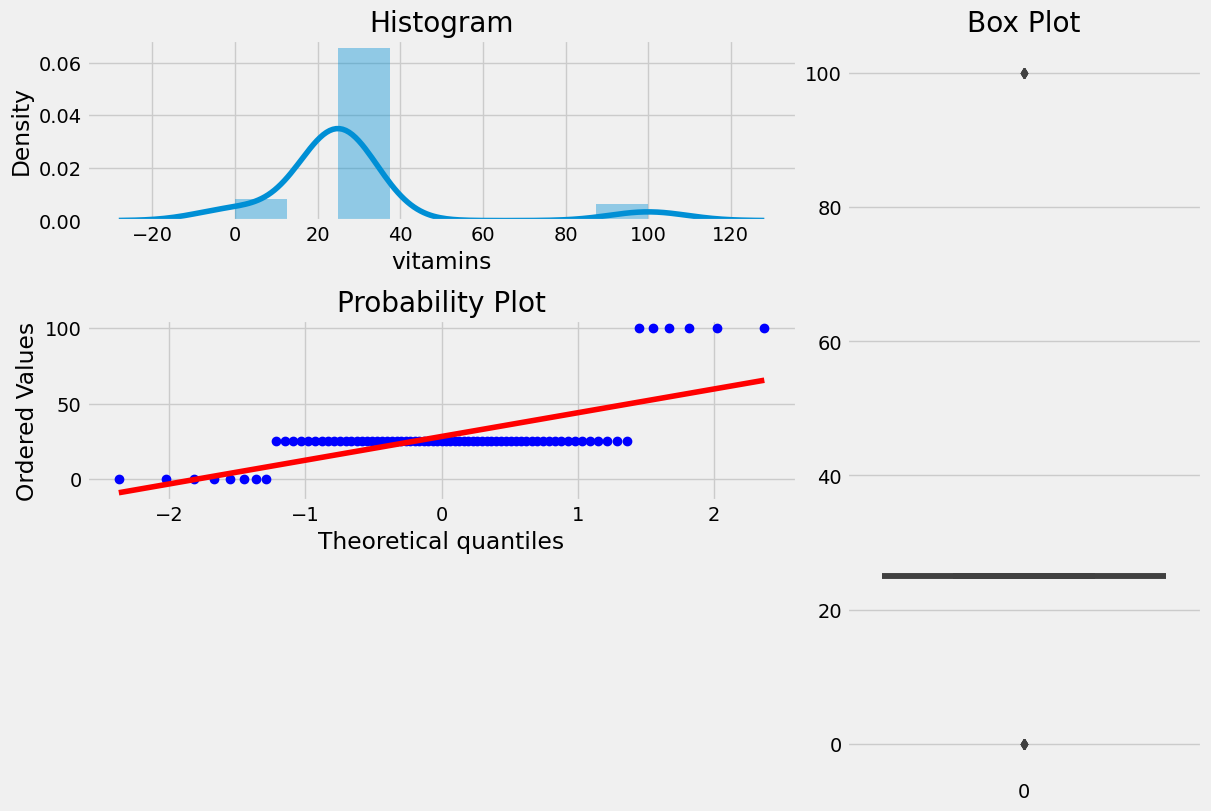

In [37]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for vitamins feature
plotting_3_chart(cereal, 'vitamins')

In [38]:
#skewness and kurtosis for vitamins feature
print("Skewness: " + str(cereal['vitamins'].skew()))
print("Kurtosis: " + str(cereal['vitamins'].kurt()))

Skewness: 2.4637037869955396
Kurtosis: 6.257233098341468


## 2.2.11 Univariate Analysis of Numerical Feature `shelf`

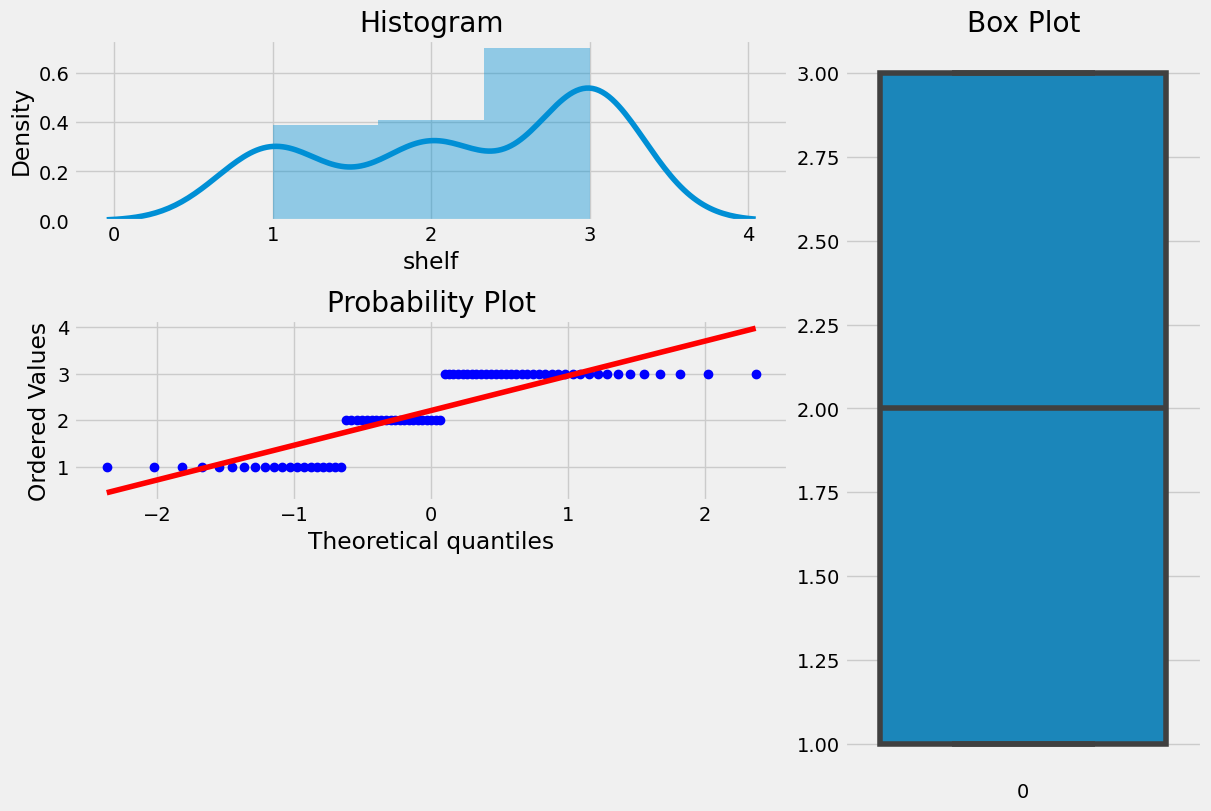

In [39]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for shelf feature
plotting_3_chart(cereal, 'shelf')

In [40]:
#skewness and kurtosis for shelf feature
print("Skewness: " + str(cereal['shelf'].skew()))
print("Kurtosis: " + str(cereal['shelf'].kurt()))

Skewness: -0.4103393006235537
Kurtosis: -1.4392012859468477


## 2.2.12 Univariate Analysis of Numerical Feature `weight`

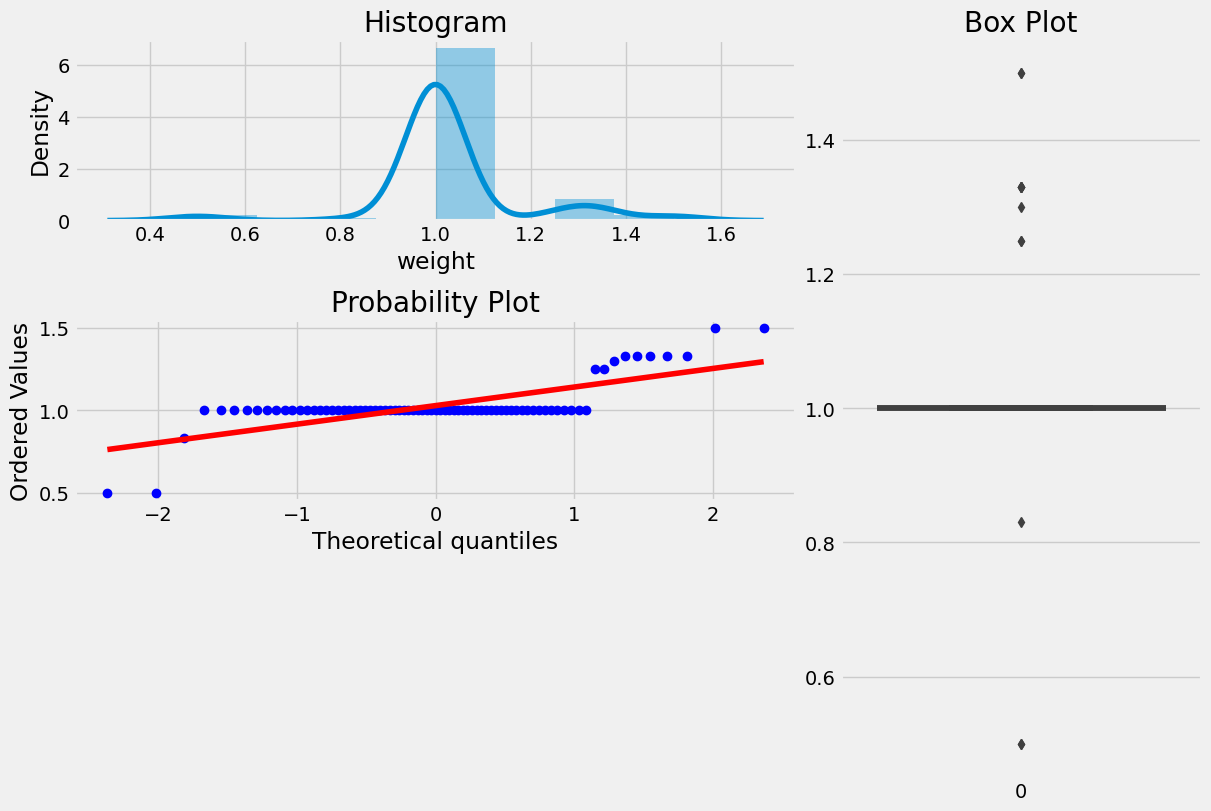

In [41]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for weight feature
plotting_3_chart(cereal, 'weight')

In [42]:
#skewness and kurtosis for weight feature
print("Skewness: " + str(cereal['weight'].skew()))
print("Kurtosis: " + str(cereal['weight'].kurt()))

Skewness: 0.3098566664468195
Kurtosis: 5.4224539002459125


## 2.2.13 Univariate Analysis of Numerical Feature `cups`

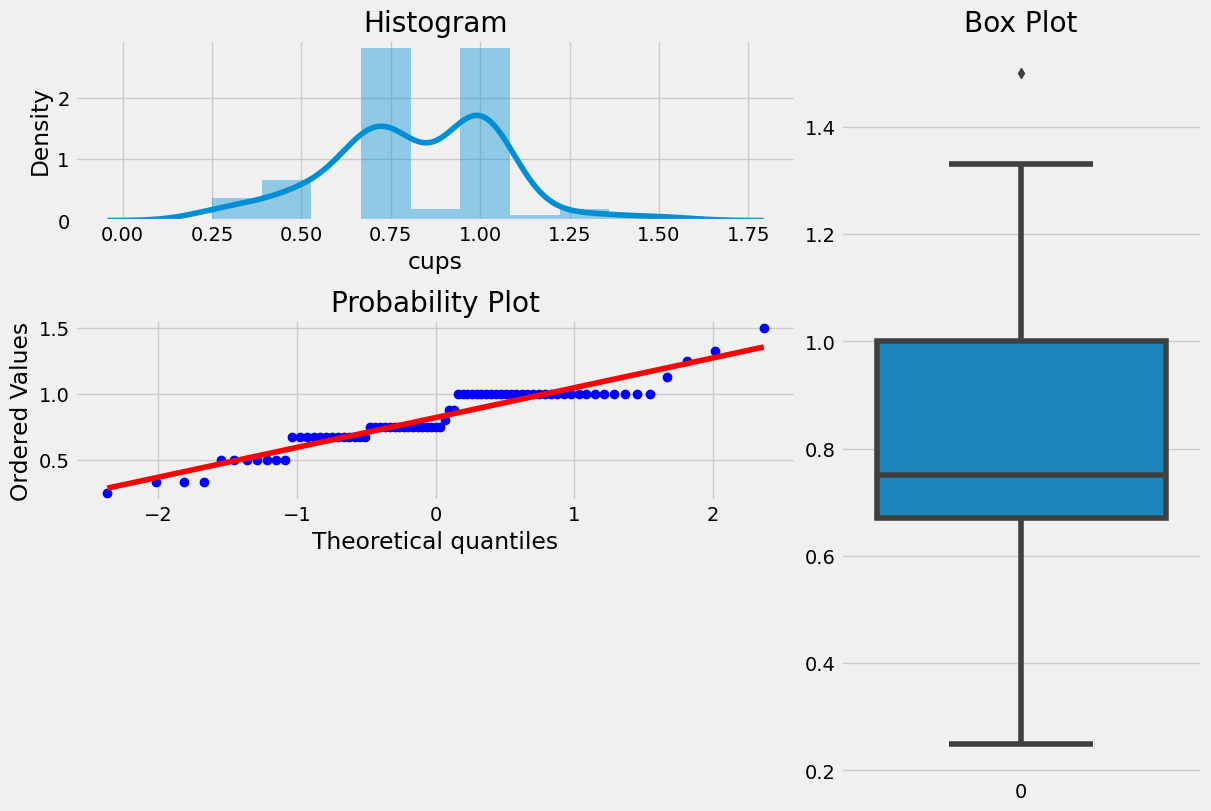

In [43]:
#Call the function defined above and plot the Histogram, BoxPlot and QQ-plot for cups feature
plotting_3_chart(cereal, 'cups')

In [44]:
#skewness and kurtosis for cups feature
print("Skewness: " + str(cereal['cups'].skew()))
print("Kurtosis: " + str(cereal['cups'].kurt()))

Skewness: -0.10498068531209813
Kurtosis: 0.3522255977400248


##### Observations
All the numeric features are not normally distributed.We shall apply Log Transformation where necessary to make the near normal distribution if our model is not looking good. All the numeric features have outliers.We will clip the numeric features to remove the outliers.

# 2.3 Bivariate Data Analysis of Categorical vs Numerical Feature in the Dataset

## 2.3.1 Bivariate Analysis of Categorical Features `type` vs Numeric Feature `rating`

In [45]:
#Mean rating by type
mean_rating_by_type = cereal.groupby("type")["rating"].mean().round(2).sort_values(ascending=False)
mean_rating_by_type

type
H    56.74
C    42.10
Name: rating, dtype: float64

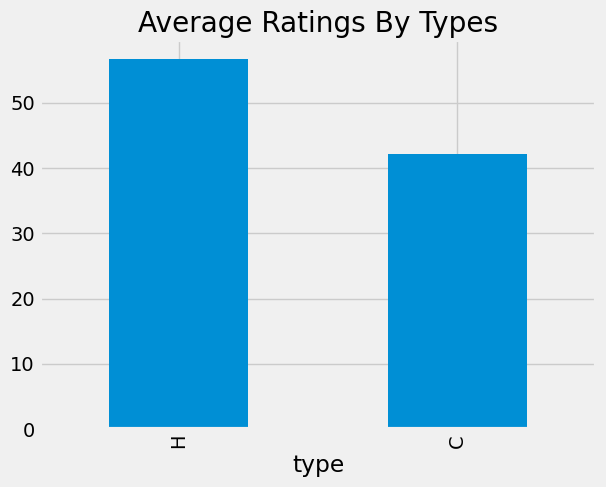

In [46]:
#Plot of Mean rating by "type"
mean_rating_by_type.plot(kind="bar", x ="type", y = "rating",title = "Average Ratings By Types");

### Observation.
Hot cereal has higher rating.This means Hot cereal has consumption and was prefered by people.

## 2.3.2 Bivariate Analysis Numeric Features `Sugars` vs Numeric Features `rating`

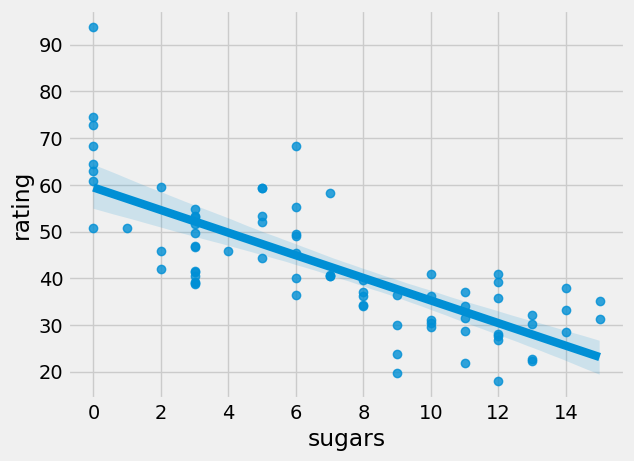

In [47]:
sns.regplot(data=cereal, x="sugars", y="rating")
plt.show()

In [48]:
#Checking correlation between sugars and rating
p_correlation = cereal["sugars"].corr(cereal["rating"]).round(2)
print(p_correlation)

-0.76


## 2.3.3 Bivariate Analysis Numeric Features `fiber` vs Numeric Features `rating`

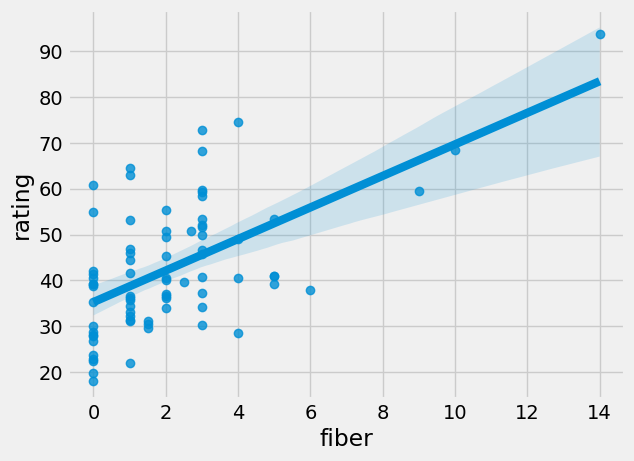

In [49]:
sns.regplot(data=cereal, x="fiber", y="rating")
plt.show()

In [50]:
#Checking correlation between fiber and rating
p_correlation = cereal["fiber"].corr(cereal["rating"]).round(2)
print(p_correlation)

0.58


# C. Data Processing
Data Processing Includes Feature Engineering(OneHot Encoding, Feature Selection, Nomalization(Log Transformation),Standardization(Feature Scaling), and Model Training

## 1. Feature Engineering

##  1.1. OneHot Encoding

In [51]:
#Converting  the categorical variable "type" to One Hot encoding with pandas get_dummies
cereal_cat = pd.get_dummies(cereal["type"], drop_first=True)
cereal = pd.concat([cereal, cereal_cat], axis=1)
cereal.drop("type", axis = 1, inplace = True)
lasso_plot_name = cereal.drop(['rating', 'shelf'], axis=1)
lasso_plot_names = lasso_plot_name.columns
#dsiplay 1st 5 rows of the dataset
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,H
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0
4,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843,0


In [52]:
#Check the dimension of the dataset again
display(f'The dataset has {cereal.shape[0]} rows and {cereal.shape[1]} columns after creating dummy features')

'The dataset has 77 rows and 14 columns after creating dummy features'

## 1.2. Feature Selection

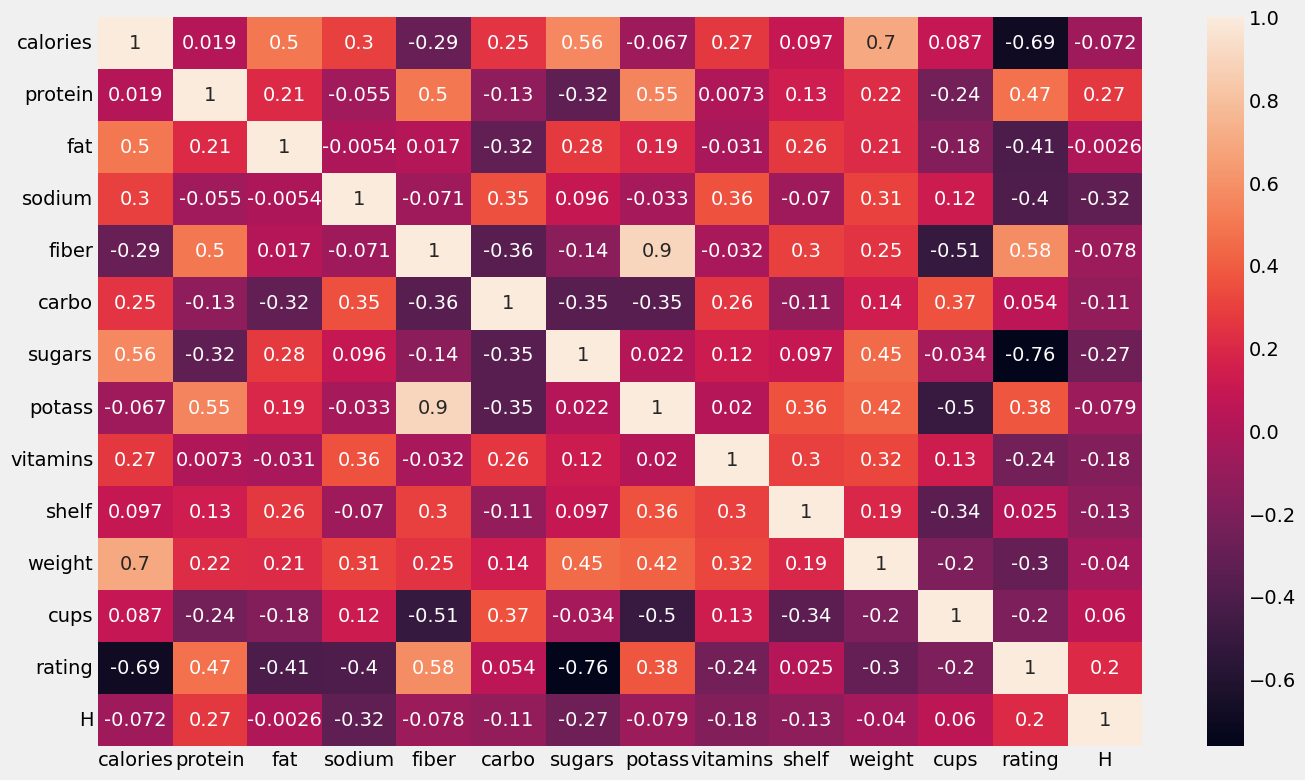

In [53]:
#Heat map showing correlations between independent variables and dependent variable
plt.figure(figsize=(15,9))
sns.heatmap(cereal.corr(), annot=True)
plt.show()

Observations:
1. The following independent features are highly correlated with our target variable "rating"
   calories,sugars, and fiber.
2. The following independent feature are highly correlated with each other.
   calories and weight, calories and sugars, calories and fats
   protein and potass, protein and fiber
   fats and calories
   fiber and cups, fiber and potass, fiber and protein
   sugars and calories
   potass and cups, potass and fiber, potass and protein
   weight and calories

In [54]:
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,H
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0
4,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843,0


##  1.3 Standardization(Feature Scaling)

In [55]:
#Separating dataset into a feature matrix and a target vector
X= cereal.drop(["rating", "shelf"], axis =1).values #feature matrix converted to 2d array with numpy
y= cereal["rating"].values                 #target vector converted to 1d array with numpy

#Split dataset into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

#Scaling the dataset
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

# 2. Model Training

[array([0.99999402, 0.99999332, 0.99999503, 0.99997135, 0.99998965,
       0.99999041, 0.99999028, 0.99998763, 0.99999839, 0.99954836]), array([0.99816059, 0.9990236 , 0.99805712, 0.99096202, 0.99750316,
       0.99639681, 0.97170217, 0.99027765, 0.99881033, 0.91669788]), array([0.93533138, 0.91627328, 0.93442162, 0.83614257, 0.93273242,
       0.92129326, 0.88877768, 0.87474819, 0.85573996, 0.48271693]), array([0.93037994, 0.85462044, 0.84412594, 0.54412684, 0.8836296 ,
       0.7686601 , 0.75110663, 0.9652591 , 0.6807581 , 0.74038158])]


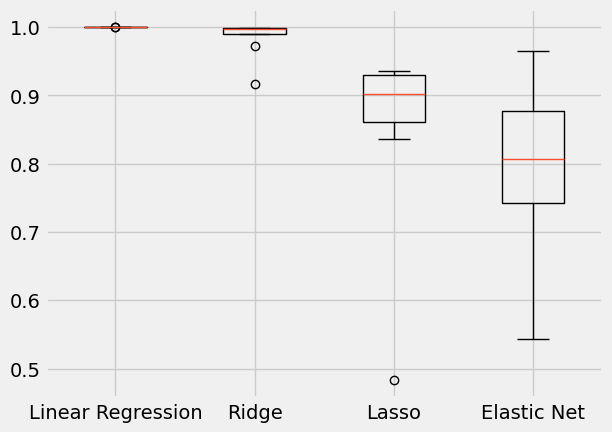

In [56]:
#Train Linear Regression, Ridge, Lasso, and Elastic Net models with no hyperparameter tuning
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(), "Lasso": Lasso(), "Elastic Net": ElasticNet()}

results = []

for model in models.values():
  kf = KFold(n_splits=10, shuffle= True, random_state= 23)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

  results.append(cv_results)
print(results)

#visualize results
plt.boxplot(results, labels= models.keys())
plt.show()


The output shows a range of cross validation R squared scores. We can also see the median of each models cross validation score represented by the orange line in each box. We can see Linear Regression has the best median score.

# D. Model Evaluation

In [57]:
#Model Performance on the test set with no hyperparameter tuning
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  test_score = model.score(X_test_scaled, y_test)
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  print("{} Test Set Score: {:.6f}".format(name, test_score), "{} Root Mean Squared Error: {:.6f}".format(name, rmse))

Linear Regression Test Set Score: 0.999998 Linear Regression Root Mean Squared Error: 0.024177
Ridge Test Set Score: 0.997356 Ridge Root Mean Squared Error: 0.832704
Lasso Test Set Score: 0.950459 Lasso Root Mean Squared Error: 3.604719
Elastic Net Test Set Score: 0.884762 Elastic Net Root Mean Squared Error: 5.497782


## 1 Hyperparameter Tuning

In [58]:
#Let's tune the hyperparamter of some of our models

kf= KFold(n_splits=10, shuffle=True, random_state=23)

#set up the parameter grid
param_grid={"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}

#Instantiate ridge
ridge = Ridge()

#Instatiate grid_cv
grid_cv= GridSearchCV(ridge, param_grid, cv=kf)

#Fit to the training data
grid_cv.fit(X_train_scaled, y_train)

best_ridge_model = grid_cv.best_estimator_

#Let's print the hyperparameters that perform the best and the best cross validation score
print(grid_cv.best_params_, round(grid_cv.best_score_, 6))

{'alpha': 0.0001, 'solver': 'lsqr'} 0.999946


In [59]:
#evaluating our newly tuned ridge model with cross validation on the training data
ridge_cross_val = cross_val_score(best_ridge_model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error")
print(ridge_cross_val)
print(np.sqrt(np.abs(ridge_cross_val.mean())))

[-0.00065433 -0.00122841 -0.00179803 -0.000691   -0.00127966 -0.0007887
 -0.00118123 -0.00023309 -0.00032323 -0.02836247]
0.06044844690149912


In [60]:
#Testing the ridge model with the test set
#Instatiate ridge with our best hyperparameter
ridge = Ridge(alpha=0.0001, solver='lsqr')
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print("Test Set Score: {:.6f}".format(ridge.score(X_test_scaled, y_test)))
print("Root Mean Squared Error:  {:.6f}".format(mean_squared_error(y_test, y_pred, squared=False)))

Test Set Score: 0.999998
Root Mean Squared Error:  0.024098


### Observation.
Ridge model performs better on unseen data `after hyperparameter tuning`.

In [61]:
#Tuning the hyperparameter of Lasso

#set up the parameter grid
param_grid={"alpha": np.linspace(0.00001, 1, 20)}

#Instantiate lasso
lasso = Lasso()

#Instatiate grid_cv
grid_lasso_cv= GridSearchCV(lasso, param_grid, cv=kf)

#Fit to the training data
grid_lasso_cv.fit(X_train_scaled, y_train)

best_lasso_model = grid_lasso_cv.best_estimator_

#Let's print the hyperparameters that perform the best and the mean cross validation score over 10 folds
print(grid_lasso_cv.best_params_, round(grid_lasso_cv.best_score_, 6))

{'alpha': 1e-05} 0.999961


In [62]:
#evaluating our newly tuned lasso model with cross validation on the training data
lasso_cross_val = cross_val_score(best_lasso_model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error")
print(lasso_cross_val)
print(np.sqrt(np.abs(lasso_cross_val.mean())))

[-0.00062413 -0.00139752 -0.00200516 -0.00073032 -0.00147547 -0.00080537
 -0.00113097 -0.00022141 -0.00035343 -0.01875639]
0.05244060924106079


[-0.22633911  3.28916245 -1.65485115 -0.05451394  3.45836967  1.11252799
 -0.70667647 -0.03439776 -0.05138546 -0.05390975 -0.0297551  -0.00766748]


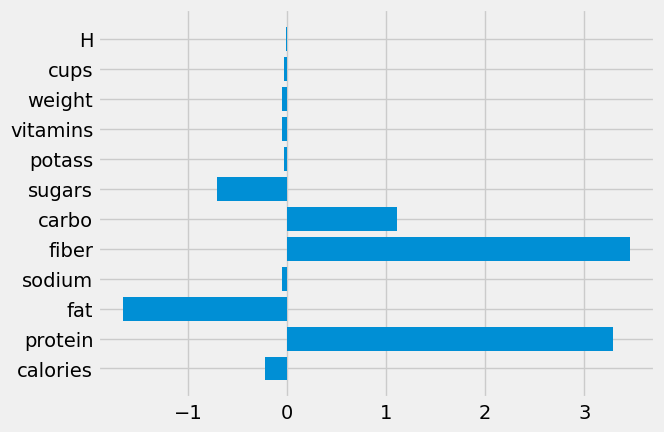

In [63]:
#let's identify feature importance in our dataset using L1 Regularization(Lasso)
lasso_coef = best_lasso_model.fit(X_train, y_train).coef_
print(lasso_coef)
plt.barh(lasso_plot_names, lasso_coef)
plt.show()

No coefficient of the feature variables was shrinked to exactly zero(0) by L1 regularization.

In [64]:
#Testing the lasso model with the test set
#Instatiate lasso with our best hyperparameter
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print("Test Set Score: {:.6f}".format(lasso.score(X_test_scaled, y_test)))
print("Root Mean Squared Error:  {:.6f}".format(mean_squared_error(y_test, y_pred, squared=False)))

Test Set Score: 0.999997
Root Mean Squared Error:  0.027657
